In [1]:
%load_ext autoreload
%autoreload 2

### Load Example Series

In [2]:
from functions import Tarloader

# Make Dataloader
# tl = Tarloader('./data/hc-11/data/')
# tl = Tarloader('G:/My Drive/DaifengWangLab/data/hc-11/data', spk=False)
# tl = Tarloader('G:/My Drive/DaifengWangLab/data/hc-11/data')
tl = Tarloader('G:/My Drive/DaifengWangLab/data/hc-11_Buddy_06272013/data')
# Show available files
print(tl.files)
# Extract session 0 (Will extract files if required, then process.  Can take up to 15 minutes)
novel, data = tl[0]

['Buddy_06272013']


In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Create df
df = pd.DataFrame(columns=['time', 'feature', 'position'])

# Append data
for i, chunk in tqdm(enumerate(data)):
    subsample = 10_000
    time = chunk['time'][::subsample] / 1000
    feature = chunk['feature0'][::subsample]
    # Get index of closest time
    timestamps = novel['sessInfo']['Position']['TimeStamps']
    timestamps = np.repeat(np.expand_dims(timestamps, axis=-1), len(time), axis=1).T
    idx = np.argmin(np.abs(timestamps - np.expand_dims(time, axis=-1)), axis=-1)
    position = novel['sessInfo']['Position']['OneDLocation'][idx]

    # Append
    # List append really isn't any faster
    add = pd.DataFrame({
        'time': time,
        'feature': feature,
        'position': position,
    })
    df = pd.concat([df, add])

162it [03:52,  1.43s/it]


In [5]:
df.shape


(1616, 3)

### Plot Series

In [6]:
import pandas as pd

df.to_csv('./temp.csv')
# df = pd.read_csv('./temp.csv')

C:\Users\Shawn\AppData\Local\Temp\ipykernel_5700\2360033016.py:8: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs['A'].get_shared_x_axes().join(axs['A'], axs['B'])


KeyError: 'y'

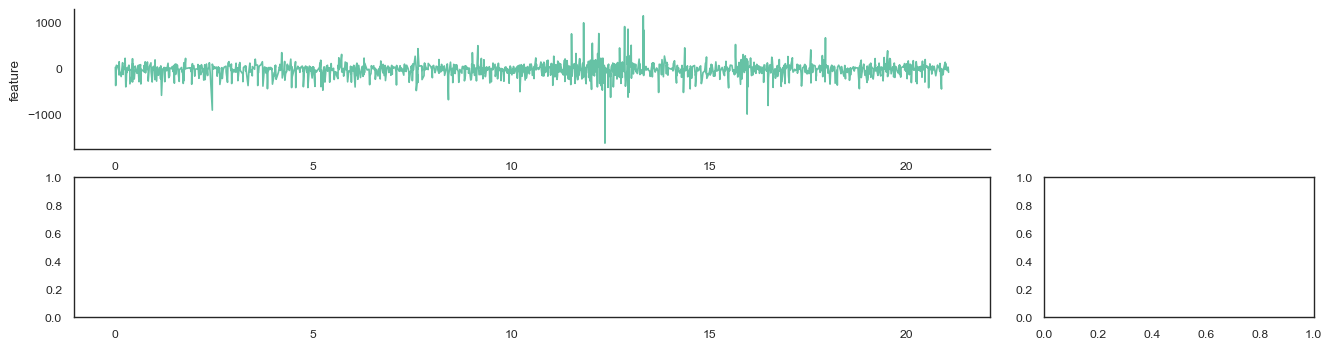

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='white', palette='Set2')

# Plot subsampled series
fig = plt.figure(figsize=(16, 4))
axs = fig.subplot_mosaic('AAA.;BBBC')
axs['A'].get_shared_x_axes().join(axs['A'], axs['B'])
sns.lineplot(data=df, x='time', y='feature', ax=axs['A'])
sns.despine(ax=axs['A'])
axs['A'].set_xlabel(None)
sns.lineplot(data=df, x='time', y='position',color=sns.color_palette()[1], ax=axs['B'])
sns.despine(ax=axs['B'])
sns.lineplot(data=df.loc[~pd.isna(df['time'])], x='time', y='position',color=sns.color_palette()[1], ax=axs['C'])
sns.despine(ax=axs['C'])